#### IMPORTING Packages

In [1]:
import numpy as np
from tensorflow.keras import models,layers,preprocessing,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import os 
import random
import shutil



2023-10-04 18:57:07.207879: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 18:57:07.542961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 18:57:07.544554: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 18:57:09.274829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Path Of The Directories

In [51]:
# os.listdir('/home/hassan-ahmed-khan/Ai Practice/datasets/lung cancer Detection')
base_dir = r'/home/hassan-ahmed-khan/Ai Practice/datasets/lung cancer Detection'
positive = os.path.join(base_dir,'positive')
negative = os.path.join(base_dir,'nagative')
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')
train_pos_dir = os.path.join(train_dir,'positive')
train_neg_dir = os.path.join(train_dir,'negative')
test_pos_dir = os.path.join(test_dir,'positive')
test_neg_dir = os.path.join(test_dir,'negative')
validation_pos_dir = os.path.join(validation_dir,'positive')
validation_neg_dir = os.path.join(validation_dir,'negative')

#### Making Directories

In [3]:
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)
os.mkdir(train_pos_dir)
os.mkdir(train_neg_dir)
os.mkdir(test_pos_dir)
os.mkdir(test_neg_dir)
os.mkdir(validation_pos_dir)
os.mkdir(validation_neg_dir)

In [3]:
print(len(os.listdir(os.path.join(base_dir,'positive'))))
print(len(os.listdir(os.path.join(base_dir,'nagative'))))

234
300


#### Shuffle Images

In [5]:
a = os.listdir(os.path.join(base_dir,'positive'))
random.shuffle(a)
a


['NORMAL2-IM-0139-0001.jpeg',
 'NORMAL2-IM-0297-0001.jpeg',
 'NORMAL2-IM-0023-0001.jpeg',
 'NORMAL2-IM-0171-0001.jpeg',
 'IM-0095-0001.jpeg',
 'NORMAL2-IM-0364-0001.jpeg',
 'NORMAL2-IM-0123-0001.jpeg',
 'NORMAL2-IM-0288-0001.jpeg',
 'IM-0037-0001.jpeg',
 'IM-0101-0001.jpeg',
 'NORMAL2-IM-0233-0001.jpeg',
 'IM-0041-0001.jpeg',
 'NORMAL2-IM-0321-0001.jpeg',
 'NORMAL2-IM-0305-0001.jpeg',
 'NORMAL2-IM-0376-0001.jpeg',
 'IM-0021-0001.jpeg',
 'IM-0025-0001.jpeg',
 'NORMAL2-IM-0079-0001.jpeg',
 'IM-0085-0001.jpeg',
 'NORMAL2-IM-0279-0001.jpeg',
 'NORMAL2-IM-0353-0001.jpeg',
 'NORMAL2-IM-0035-0001.jpeg',
 'NORMAL2-IM-0195-0001.jpeg',
 'NORMAL2-IM-0272-0001.jpeg',
 'IM-0050-0001.jpeg',
 'NORMAL2-IM-0348-0001.jpeg',
 'NORMAL2-IM-0368-0001.jpeg',
 'NORMAL2-IM-0207-0001.jpeg',
 'NORMAL2-IM-0357-0001.jpeg',
 'IM-0079-0001.jpeg',
 'IM-0105-0001.jpeg',
 'NORMAL2-IM-0033-0001.jpeg',
 'NORMAL2-IM-0332-0001.jpeg',
 'NORMAL2-IM-0302-0001.jpeg',
 'NORMAL2-IM-0374-0001-0002.jpeg',
 'IM-0039-0001.jpeg',
 'N

#### Divide images into 3 parts Training,Test,Validation

In [95]:
positive_images = os.listdir(positive)
random.shuffle(positive_images)
negative_images = os.listdir(negative)
random.shuffle(negative_images)
train_pos_images = positive_images[:150]
train_neg_images = negative_images[:150]
validation_pos_images = positive_images[150:190]
validation_neg_images = negative_images[150:230]
test_pos_images = positive_images[190:]
test_neg_images = negative_images[230:]


#### Copying each part into Their respective folded

In [7]:
for img in train_pos_images:
    src = os.path.join(positive,img)
    dst = os.path.join(train_pos_dir,img)
    shutil.copy(src,dst)

for img in train_neg_images:
    src = os.path.join(negative,img)
    dst = os.path.join(train_neg_dir,img)
    shutil.copy(src,dst)

for img in validation_pos_images:
    src = os.path.join(positive,img)
    dst = os.path.join(validation_pos_dir,img)
    shutil.copy(src,dst)

for img in validation_neg_images:
    src = os.path.join(negative,img)
    dst = os.path.join(validation_neg_dir,img)
    shutil.copy(src,dst)

for img in test_pos_images:
    src = os.path.join(positive,img)
    dst = os.path.join(test_pos_dir,img)
    shutil.copy(src,dst)

for img in test_neg_images:
    src = os.path.join(negative,img)
    dst = os.path.join(test_neg_dir,img)
    shutil.copy(src,dst)


In [96]:
print(len(test_pos_images))
print(len(test_neg_images))

44
70


#### Making Generator By using inbuilt Tensorflow Function for applying data augmentation

In [6]:
train_data_gen = ImageDataGenerator(rescale=1./255,brightness_range=(0.2,0.6),vertical_flip=True,horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)


#### passing validaton images and train images into generator

In [7]:
train_gen = train_data_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size=32)
val_gen = test_data_gen.flow_from_directory(validation_dir,target_size=(150,150),class_mode='binary',batch_size=32)

Found 300 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [11]:
for data,label in train_gen:
    print(data.shape)
    print(label.shape)
    break

(32, 150, 150, 3)
(32,)


#### Making Model Architecture

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPool2D((2,2)))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 dropout_3 (Dropout)         (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 350464)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                11214880  
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                      

#### Training or Fitting and Validating model by using training and validation images

In [18]:
history = model.fit_generator(train_gen,steps_per_epoch=10,epochs=10,validation_data=val_gen,validation_steps=4)

/tmp/ipykernel_3085/2611730864.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,steps_per_epoch=10,epochs=10,validation_data=val_gen,validation_steps=4)


Epoch 1/10
10/10 [==============================] - 14s 1s/step - loss: 3.7555 - accuracy: 0.4867 - val_loss: 1.2477 - val_accuracy: 0.3860
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 0.7516 - accuracy: 0.5833 - val_loss: 0.5657 - val_accuracy: 0.7456
Epoch 3/10
10/10 [==============================] - 19s 2s/step - loss: 0.7945 - accuracy: 0.5367 - val_loss: 0.6377 - val_accuracy: 0.6316
Epoch 4/10
10/10 [==============================] - 19s 2s/step - loss: 0.7015 - accuracy: 0.7300 - val_loss: 0.5422 - val_accuracy: 0.7632
Epoch 5/10
10/10 [==============================] - 19s 2s/step - loss: 0.5521 - accuracy: 0.8067 - val_loss: 0.5068 - val_accuracy: 0.7632
Epoch 6/10
10/10 [==============================] - 20s 2s/step - loss: 0.5141 - accuracy: 0.7967 - val_loss: 0.4550 - val_accuracy: 0.8333
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0.5378 - accuracy: 0.7867 - val_loss: 0.4636 - val_accuracy: 0.8509
Epoch 8/10
10/10 [==

#### passing Test Images Into Generator for evalution of model

In [53]:
val_gen = test_data_gen.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary',batch_size=32)
test = model.evaluate_generator(val_gen)

Found 114 images belonging to 2 classes.


/tmp/ipykernel_3085/2205740475.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test = model.evaluate_generator(val_gen)


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_8/dense_16/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_3085/2602469645.py", line 2, in <module>
      test = model.evaluate_generator(test_gen)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2852, in evaluate_generator
      return self.evaluate(
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2200, in evaluate
      logs = test_function_runner.run_step(
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 4000, in run_step
      tmp_logs = self._function(dataset_or_iterator)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1972, in test_function
      return step_function(self, iterator)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1956, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1944, in run_step
      outputs = model.test_step(data)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1850, in test_step
      y_pred = self(x, training=False)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_8/dense_16/Relu'
Matrix size-incompatible: In[0]: [32,16875], In[1]: [2048,32]
	 [[{{node sequential_8/dense_16/Relu}}]] [Op:__inference_test_function_1955869]

####  Printing Test Result

In [20]:
test

[1.1394065618515015, 0.6491228342056274]

#### =======================================================================================================

#### Making Model by using Feature Extraction fron pretrained convent (VGG16)

In [21]:
conv = VGG16(include_top=False,input_shape=(150,150,3))
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### Featture Extraction Method

In [22]:
def feature_extraction(directory,sample_count,vertical_flip=False,horizontal_flip=False,zoom_range=0.0):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    gen = ImageDataGenerator(rescale=1./255,vertical_flip=vertical_flip,horizontal_flip=horizontal_flip,zoom_range=zoom_range)
    data_gen = gen.flow_from_directory(directory,target_size=(150,150),class_mode='binary',batch_size=30)
    i=0
    for img_batch,label_batch in data_gen:
        prediction = conv.predict(img_batch)
        features[i*30 : (i+1)*30] = prediction 
        labels[i*30:(i+1)*30] = label_batch
        i+=1
        if i*30 >= sample_count:
            return features,labels
    

#### passing train images and validation images to Feature Extraction method

In [23]:
train_features = feature_extraction(train_dir,300,vertical_flip=True,horizontal_flip=True,zoom_range=(0.2,0.5))
validation_features = feature_extraction(validation_dir,120)

Found 300 images belonging to 2 classes.
1/1 [==============================] - 9s 9s/step
Found 120 images belonging to 2 classes.
1/1 [==============================] - 6s 6s/step


#### making model Architecture

In [34]:
model = models.Sequential()
# model2.add(layers.MaxPool2D((2,2)))
# model2.add(layers.Flatten())
# model2.add(layers.Dropout(0.5))
# model2.add(layers.Dense(32,activation='relu'))
# # model2.add(layers.Dropout(0.5))
# model2.add(layers.Dense(1,activation='sigmoid'))


model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),loss='binary_crossentropy',metrics=['acc'])
# model.summary()


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

#### Training Or Fitting The Model

In [29]:
print((train_features[0]).shape)
history = model.fit(train_features[0],train_features[1],epochs=10,batch_size=32,validation_data=validation_features)

(300, 4, 4, 512)
Epoch 1/10
10/10 [==============================] - 1s 35ms/step - loss: 1.1816 - acc: 0.5000 - val_loss: 0.6140 - val_acc: 0.6667
Epoch 2/10
10/10 [==============================] - 0s 15ms/step - loss: 1.1233 - acc: 0.5000 - val_loss: 0.6159 - val_acc: 0.6667
Epoch 3/10
10/10 [==============================] - 0s 17ms/step - loss: 1.0569 - acc: 0.5000 - val_loss: 0.6203 - val_acc: 0.6667
Epoch 4/10
10/10 [==============================] - 0s 12ms/step - loss: 1.0382 - acc: 0.5000 - val_loss: 0.6269 - val_acc: 0.6667
Epoch 5/10
10/10 [==============================] - 0s 12ms/step - loss: 0.9630 - acc: 0.5033 - val_loss: 0.6358 - val_acc: 0.6667
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 0.9188 - acc: 0.4967 - val_loss: 0.6457 - val_acc: 0.6583
Epoch 7/10
10/10 [==============================] - 0s 11ms/step - loss: 0.8869 - acc: 0.4967 - val_loss: 0.6572 - val_acc: 0.6250
Epoch 8/10
10/10 [==============================] - 0s 12ms/step -

#### ======================================================================================================

#### Making Model Architecture By using convent as an layer but freeze convent from training

In [31]:
conv.trainable = False
model = models.Sequential()
model.add(conv)
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

#### Model Summary

In [32]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 2, 2, 512)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 32)                65568     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                      

####  Training or Fitting Model

In [33]:
# model.fit(train_gen,steps_per_epoch=10,epochs=5,validation_data=val_gen,validation_steps=5)
history = model.fit(train_gen,epochs=5,steps_per_epoch=10,validation_data=val_gen,validation_steps=4)

Epoch 1/5
10/10 [==============================] - 99s 10s/step - loss: 0.7366 - acc: 0.5333 - val_loss: 0.7434 - val_acc: 0.3860
Epoch 2/5
10/10 [==============================] - 105s 10s/step - loss: 0.7233 - acc: 0.5300 - val_loss: 0.7433 - val_acc: 0.3947
Epoch 3/5
10/10 [==============================] - 92s 10s/step - loss: 0.7099 - acc: 0.5467 - val_loss: 0.7429 - val_acc: 0.3860
Epoch 4/5
10/10 [==============================] - 86s 8s/step - loss: 0.7419 - acc: 0.4733 - val_loss: 0.7459 - val_acc: 0.3860
Epoch 5/5
10/10 [==============================] - 92s 9s/step - loss: 0.7117 - acc: 0.5000 - val_loss: 0.7477 - val_acc: 0.3860


#### =================================================Fine Tuning===================================

#### Freeze convent From learning except few lower layers

In [71]:
conv.trainable = True
set_trainable = False
for layer in conv.layers:
    if layer.name == 'block5':
        set_trainableinable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [72]:
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### Making Architeture

In [81]:
model = models.Sequential()
model.add(conv)
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])


#### Summary Of the model

In [82]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 2, 2, 512)         0         
 ng2D)                                                           
                                                                 
 flatten_39 (Flatten)        (None, 2048)              0         
                                                                 
 dense_78 (Dense)            (None, 32)                65568     
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_79 (Dense)            (None, 1)                 33        
                                                     

In [ ]:
history = model.fit(train_gen,epochs=10,steps_per_epoch=10,validation_data=val_gen,validation_steps=4)

Epoch 1/10
10/10 [==============================] - 77s 8s/step - loss: 0.7082 - acc: 0.5367 - val_loss: 0.6945 - val_acc: 0.4750
Epoch 2/10
10/10 [==============================] - 83s 9s/step - loss: 0.6836 - acc: 0.5733 - val_loss: 0.6925 - val_acc: 0.4917
Epoch 3/10
10/10 [==============================] - 86s 8s/step - loss: 0.7325 - acc: 0.5033 - val_loss: 0.6946 - val_acc: 0.4917
Epoch 4/10
10/10 [==============================] - 76s 8s/step - loss: 0.7119 - acc: 0.5067 - val_loss: 0.6883 - val_acc: 0.4917
Epoch 5/10
 1/10 [==>...........................] - ETA: 53s - loss: 0.7015 - acc: 0.5938

In [7]:
train_features,train_labels = feature_extraction(train_dir,300,vertical_flip=True,horizontal_flip=True,zoom_range=(0.2,0.5))
validation_features,validation_labels = feature_extraction(validation_dir,120)



NameError: name 'feature_extraction' is not defined

In [57]:
a = np.array(train_labels)
b = np.array(validation_labels)
concatenated_array = np.concatenate((a, b), axis=0)
print(concatenated_array.shape)
a[1:10] + a[10:100]

(540,)


ValueError: operands could not be broadcast together with shapes (9,) (90,) 

####  ============================= Applying K-fold Technique ===============================================

In [29]:
def feature_extraction(directory,sample_count,vertical_flip=False,horizontal_flip=False,zoom_range=0.0):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    gen = ImageDataGenerator(rescale=1./255,vertical_flip=vertical_flip,horizontal_flip=horizontal_flip,zoom_range=zoom_range)
    data_gen = gen.flow_from_directory(directory,target_size=(150,150),class_mode='binary',batch_size=30)
    i=0
    for img_batch,label_batch in data_gen:
        prediction = conv.predict(img_batch)
        features[i*30 : (i+1)*30] = prediction 
        labels[i*30:(i+1)*30] = label_batch
        i+=1
        if i*30 >= sample_count:
            return features,labels

In [35]:
print((train_features[0].shape))

(4, 4, 512)


#### Applying Feature Extraction Method

In [35]:
train_features,train_labels = feature_extraction(train_dir,300,vertical_flip=True,horizontal_flip=True,zoom_range=(0.2,0.5))
validation_features,validation_labels = feature_extraction(validation_dir,120)
train_features = np.concatenate((train_features,validation_features), axis=0)
train_labels =np.concatenate((train_labels,validation_labels),axis=0)

print((train_features.shape))

    

Found 300 images belonging to 2 classes.
1/1 [==============================] - 7s 7s/step
Found 120 images belonging to 2 classes.
1/1 [==============================] - 10s 10s/step
(420, 4, 4, 512)


In [ ]:
print((np.reshape(train_labels,(420))))
# print((validation_labels))
len(train_labels)

####  Making build Model Function

In [36]:
def build_model():
#     conv.trainable = False
    model2 = models.Sequential()
    model2.add(layers.MaxPool2D((2,2)))
    model2.add(layers.Flatten())
    model2.add(layers.Dropout(0.5))
    model2.add(layers.Dense(32,activation='relu'))
    # model2.add(layers.Dropout(0.5))
    model2.add(layers.Dense(1,activation='sigmoid'))

    model2.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),loss='binary_crossentropy',metrics=['acc'])
    return model

#### applying K- Fold Technique By using above function In which Number of Folds is 5 also training the model and Number Of Ecpochs 10

In [38]:

folds = 5
sample_per_fold = len(train_labels)//folds
validation_score = []
for fold in range(folds) :
    print('fold # ', fold)
    validatoin_data = train_features[fold * sample_per_fold : (fold+1)*sample_per_fold]
    validation_label = train_labels[fold*sample_per_fold : (fold+1)*sample_per_fold]
    train_data = np.concatenate([train_features[:fold * sample_per_fold],train_features[(fold + 1) * sample_per_fold:]],axis=0)  
    train_label = np.concatenate([train_labels[:fold * sample_per_fold],train_labels[(fold + 1) * sample_per_fold:]],axis=0)
    print(train_label.shape)
    print(train_data.shape)
    print(validatoin_data.shape)
    print(validation_label.shape)
    model = build_model()
#     model.summary()
#     history = model.fit(train_features,train_labels,batch_size=32,epochs=10)
    history = model.fit(train_data, train_label,epochs=10, batch_size=32)
    #     validation_score.append(history.history['val_acc'])
    
    
    
print(validation_score)

fold #  0
(336,)
(336, 4, 4, 512)
(84, 4, 4, 512)
(84,)
Epoch 1/10
11/11 [==============================] - 1s 5ms/step - loss: 0.7323 - acc: 0.4911
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7204 - acc: 0.5208
Epoch 3/10
11/11 [==============================] - 0s 7ms/step - loss: 0.7071 - acc: 0.5774
Epoch 4/10
11/11 [==============================] - 0s 9ms/step - loss: 0.7235 - acc: 0.5179
Epoch 5/10
11/11 [==============================] - 0s 8ms/step - loss: 0.7239 - acc: 0.4911
Epoch 6/10
11/11 [==============================] - 0s 9ms/step - loss: 0.7168 - acc: 0.5149
Epoch 7/10
11/11 [==============================] - 0s 12ms/step - loss: 0.6957 - acc: 0.5446
Epoch 8/10
11/11 [==============================] - 0s 8ms/step - loss: 0.7241 - acc: 0.5327
Epoch 9/10
11/11 [==============================] - 0s 6ms/step - loss: 0.7019 - acc: 0.5536
Epoch 10/10
11/11 [==============================] - 0s 5ms/step - loss: 0.7039 - acc: 0.5536
fold #  1
(3

#### Applying K- Fold Method With number of epochs 500

In [43]:
folds=5
num_val_samples = len(train_labels)//folds
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_features[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_features[:i * num_val_samples],train_features[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(train_features,train_labels,epochs=num_epochs, batch_size=32,validation_data=(val_data,val_targets),verbose=0)
    val_history = history.history['val_acc']
    validation_score.append(val_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


#### Checking Validation Score

In [44]:
validation_score

[[0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.8333333134651184,
  0.833333

#### Finding Mean Validation Score

In [45]:
np.mean(validation_score)

0.896200002193451

In [58]:
len(validation_score)

5

In [93]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_gen = test_data_gen.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary',batch_size=32)
for data,label in test_gen:
    print(data.shape)
    print(label.shape)
    break

Found 114 images belonging to 2 classes.
(32, 150, 150, 3)
(32,)


#### Evaluate Model on test Data

In [99]:
test_feature,test_label = feature_extraction(test_dir,114)
test = model.evaluate(test_feature,test_label)

Found 114 images belonging to 2 classes.
4/4 [==============================] - 0s 4ms/step - loss: 0.4091 - acc: 0.8684


#### Test Results

In [100]:
test

[0.40908724069595337, 0.8684210777282715]

####  checking mean As per Epochs

In [85]:
print(len(validation_score))
print(len(validation_score[0]))
for i in range(num_epochs):
    a = []
    for x in validation_score:
#         print(x)
        a.append(x[i])
        print(i)
#     print(a)
    m = np.mean(a)
    break
# print(m)


val = np.array(validation_score)
print(val.shape)
mean = np.mean(val,axis=0)
mean.shape
mean[0]

500
0
0
0
0
0
(5, 500)


0.8880952358245849

In [86]:
average_val_history = np.mean(val,axis=0)

####  Taking mean As per Epochs and Visualize The result

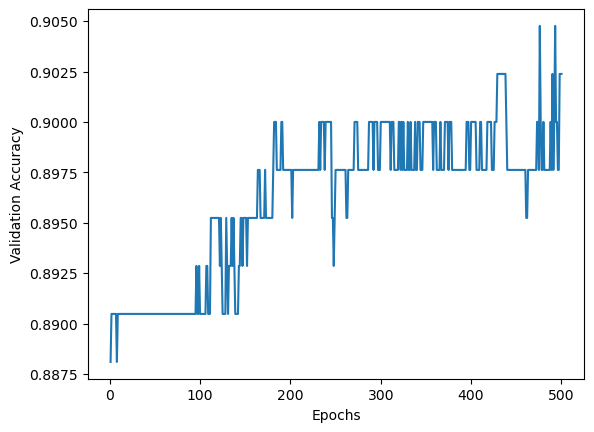

In [87]:
average_val_history = [np.mean([x[i] for x in validation_score]) for i in range(num_epochs)]


import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_val_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

#### Saving And Loading The Model

In [102]:
model.save('lungs_cancer_classification.h5')

/home/hassan-ahmed-khan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [105]:
model.save('lungs_cancer_classification.sav')

INFO:tensorflow:Assets written to: lungs_cancer_classification.sav/assets


INFO:tensorflow:Assets written to: lungs_cancer_classification.sav/assets


In [106]:
network = models.load_model('lungs_cancer_classification.sav')

In [107]:
network.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_8 (MaxPoolin  (None, None, None, None   0         
 g2D)                        )                                   
                                                                 
 dropout_8 (Dropout)         (None, None, None, None   0         
                             )                                   
                                                                 
 flatten_8 (Flatten)         (None, None)              0         
                                                                 
 dense_16 (Dense)            (None, 32)                65568     
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 65601 (256.25 KB)
Trainable params: 6560

In [131]:
print(test_feature[0].shape)
print(test_label[50])

network.predict(test_feature)[50]

(4, 4, 512)
1.0
4/4 [==============================] - 0s 2ms/step


array([0.94766915], dtype=float32)

In [132]:
network.evaluate(test_feature,test_label)

4/4 [==============================] - 0s 3ms/step - loss: 0.4091 - acc: 0.8684


[0.40908724069595337, 0.8684210777282715]